In [1]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords

In [2]:
path = '/Users/Prakriti/Desktop/'
file = 'cream_data.csv'
df = pd.read_csv(path + file)
print(df.shape)
df.sample(3)

(120, 7)


,result index,product,price,benefits,use,description,url
46,47,Pureus Skin Whitening Face Cream for Glowing S...,449,"Fairness & Nourished skin, control blemishes &...","Daily Care, Skin-hydrating-and-moisturizing",WANT SOFT & SUPPLE SKIN ? Â : Are you also los...,https://www.amazon.in/Whitening-Brightening-Li...
38,39,GO LITE NATURAL SKIN Lightening CREAM WITH SUN...,480,Lightening,"Moisturizing, Brightening, Softening, Hydratin...",Go-lite Skin Lightening Cream With Sunscreen I...,https://www.amazon.in/LITE-NATURAL-Lightening-...
73,74,Sanfe 2 in 1 Back & Bum Anti-Cellulite Serum |...,349,Shea butter High concentrations of fatty acids...,"Dark Spots, Inflammation, Brightening, Pigment...",Reduces the appearance of cellulite Topical tr...,https://www.amazon.in/Sanfe-Anti-Cellulite-cel...


In [3]:
# remove commas and cast price column to integer type

df.price = df.price.str.replace(',', '').astype(int)


In [4]:
# df.product is causing problems so 'product' might be a method...

df.rename(columns = {'product':'item'}, inplace = True)

In [5]:
df[:3]

,result index,item,price,benefits,use,description,url
0,1,KOJO Absolute Daily Care combo with Deep Clean...,3210,"Anti aging, Acne Control, gentle exfoliation, ...","Dark Spots, Acne, Dryness",INGREDIENTS: KOJO Absolute Daily Care combo co...,https://www.amazon.in/gp/slredirect/picassoRed...
1,2,KOJO Absolute Daily Care combo with Deep Clean...,3210,"Anti aging, Acne Control, gentle exfoliation, ...","Anti-Aging, SPF 30, Anti Wrinkle Day Cream",INGREDIENTS: KOJO Absolute Daily Care combo co...,https://www.amazon.in/gp/slredirect/picassoRed...
2,3,Enchanted beauty Dermatologists Recommended Be...,2099,Brightening,"Daily Care, Skin-hydrating-and-moisturizing",Gives the skin an effect of full of natural gl...,https://www.amazon.in/gp/slredirect/picassoRed...


## language used for product / item name

> a list of all words (1600)

In [6]:
# cast the column that interests us to a list

all_items = df.item.tolist()

In [7]:
# put all the words in a single list - and lowercase them all at the same time

words = []

for x in all_items:
    line = x.split()
    for y in line:
        y = y.lower()
        words.append(y)
print(len(words))


2567


In [8]:
# remove numbers and punctuation characters

words = [t for t in words if t.isalpha()]
print(len(words))

1865


In [9]:
# set the stop words

stop_words = set(stopwords.words('english')) 


In [10]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
# pull stopwords from the list of words

word_list = [x for x in words if x not in stop_words]

print(len(word_list))


1599


In [12]:
# 'men' makes the top 20 words
# gm (for gram) needs to become a stopword

Counter(word_list).most_common(10)

[('cream', 134),
 ('skin', 113),
 ('face', 74),
 ('lightening', 65),
 ('brightening', 43),
 ('dark', 29),
 ('day', 24),
 ('women', 22),
 ('gm', 21),
 ('glowing', 20)]

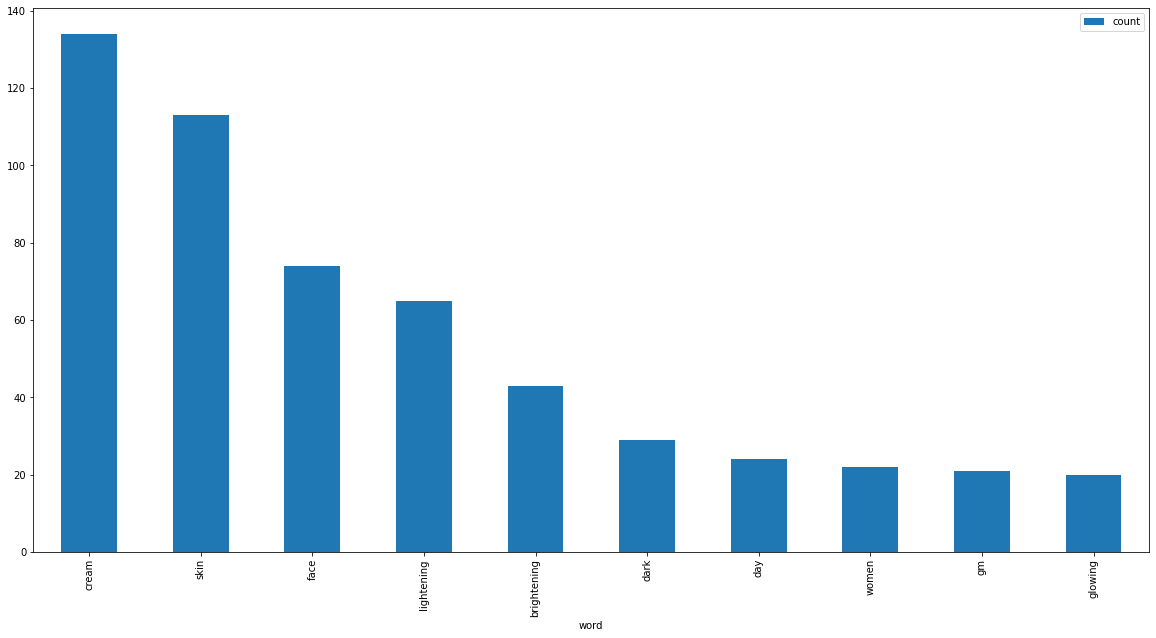

In [13]:
top_ten = Counter(word_list).most_common(10)
headers = ['word', 'count']
df_g = pd.DataFrame(top_ten, columns = headers)
df_g.plot.bar(x = 'word', y = 'count', figsize = (20, 10));

## use list of product names to make a single text

> to see the context of key words

In [14]:
# start with the list of all product names

all_items

['KOJO Absolute Daily Care combo with Deep Cleansing Face Wash, Gentle Exfoliating Scrub, Light Enriching Day Cream, and Skin Rejuvenating Serum for both Men & Women, All Natural, Vegan, & Cruelty free',
 'KOJO Absolute Daily Care combo with Deep Cleansing Face Wash, Gentle Exfoliating Scrub, Light Enriching Day Cream, and Skin Rejuvenating Serum for both Men & Women, All Natural, Vegan, & Cruelty free',
 'Enchanted beauty Dermatologists Recommended Best Brightening Max Cream for Fairness and Glowing',
 'Enchanted beauty Dermatologists Recommended Best Brightening Max Cream for Fairness and Glowing',
 'Oriflame Sweden Optimals Clear white Lightening Day Cream-50 ml with one Optimals Clear white Lightening Night Cream-50 m',
 'Oriflame Optimals Clear White Lightening Day Cream 50 ml',
 'Botanic Rain Ayurvedic Face Cream, Anti Aging Cream For Women, Day Cream For Women Daily Use, Mens Face Cream, Youth Face Cream, Anti Wrinkles Cream For Women, Depigmentation Cream, Day Cream With SPF, F

In [15]:
# assemble a single text from all the product names

text = ''

for x in range(120):
    text = text + ". " + all_items[x]

# trim the first two characters
text = text[2:]

# lowercase the lot
text = text.lower()

In [16]:
text

"kojo absolute daily care combo with deep cleansing face wash, gentle exfoliating scrub, light enriching day cream, and skin rejuvenating serum for both men & women, all natural, vegan, & cruelty free. kojo absolute daily care combo with deep cleansing face wash, gentle exfoliating scrub, light enriching day cream, and skin rejuvenating serum for both men & women, all natural, vegan, & cruelty free. enchanted beauty dermatologists recommended best brightening max cream for fairness and glowing. enchanted beauty dermatologists recommended best brightening max cream for fairness and glowing. oriflame sweden optimals clear white lightening day cream-50 ml with one optimals clear white lightening night cream-50 m. oriflame optimals clear white lightening day cream 50 ml. botanic rain ayurvedic face cream, anti aging cream for women, day cream for women daily use, mens face cream, youth face cream, anti wrinkles cream for women, depigmentation cream, day cream with spf, face glow cream for 

In [17]:
# use regex to see what follows terms like skin, assign to a variable

follow_skin = re.findall(r"\b[Ss]kin (\w+)", text)

In [18]:
# most common terms that follow 'skin'

Counter(follow_skin).most_common()

[('lightening', 40),
 ('brightening', 12),
 ('types', 9),
 ('tone', 7),
 ('whitening', 6),
 ('for', 5),
 ('rejuvenating', 2),
 ('type', 2),
 ('fairness', 2),
 ('radiance', 2),
 ('with', 2),
 ('shade', 2),
 ('rejuvenation', 1),
 ('lightning', 1),
 ('face', 1),
 ('ibglow', 1),
 ('of', 1),
 ('care', 1),
 ('cream', 1)]

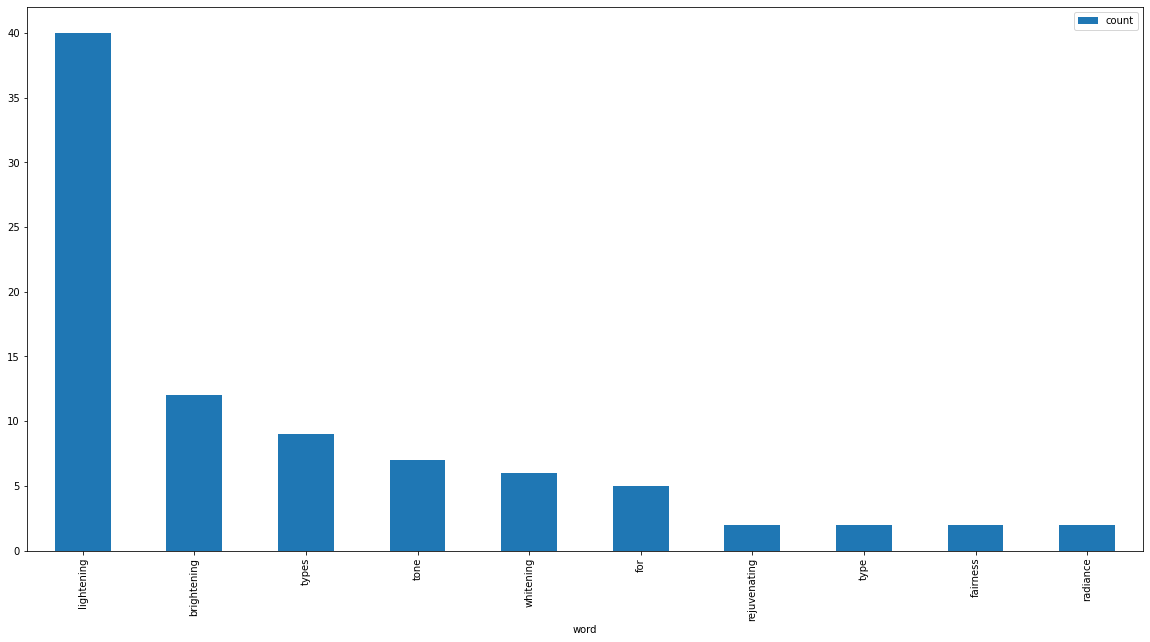

In [19]:
# chart

skin_follow_top = Counter(follow_skin).most_common(10)
headers = ['word', 'count']
df_g = pd.DataFrame(skin_follow_top, columns = headers)
df_g.plot.bar(x = 'word', y = 'count', figsize = (20, 10));

In [23]:
# use regex to see what follows terms like dark, assign to a variable

follow_dark = re.findall(r"\b[Dd]ark (\w+)", text)

In [24]:
# most common terms that follow 'dark'

Counter(follow_dark).most_common()

[('spots', 18), ('Spots', 5), ('spot', 2), ('circles', 1)]

## same, for the description col

In [20]:
desc = df.description.tolist()

# assemble a single text from all the product names
text = ''
for x in range(120):
    text = text + ". " + desc[x]
text = text[2:]
text = text.lower()


TypeError: can only concatenate str (not "float") to str

In [ ]:
text